In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

In [2]:
# Load your DataFrame
df = pd.read_csv('final_results/experiments_results.csv')

### Plot Std and Time Series Lenght

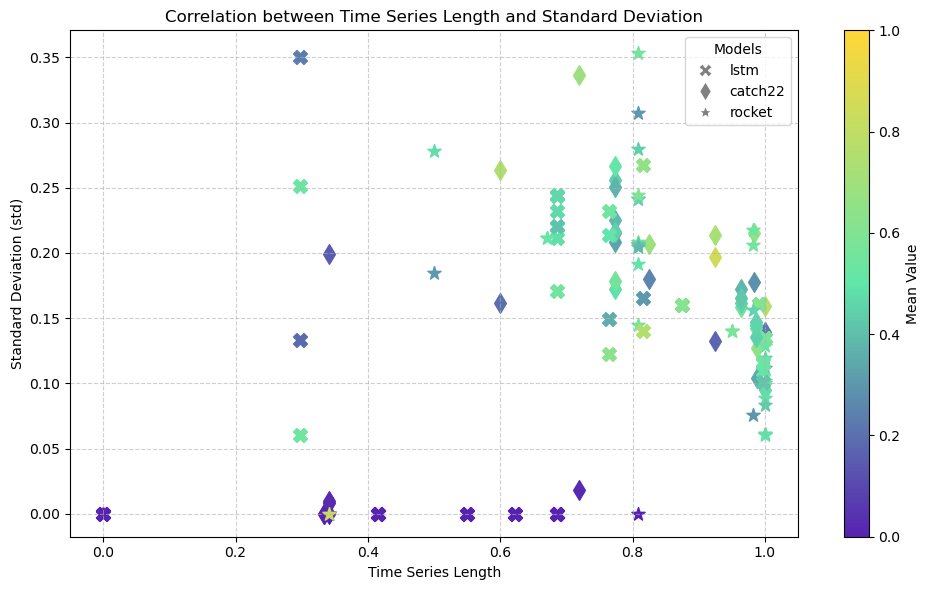

In [3]:
plt.figure(figsize=(10, 6))

# Add jittering to n_classes to reduce overlap
np.random.seed(42)  # For reproducibility
df['ts_length_jittered'] = df['ts_length'] + np.random.uniform(-0.3, 0.3,size=len(df))  # Smaller jitter for classes

# Define a custom colormap for the mean values
colors = ["#5722B1", "#61E6AA", "#FFD738"]
cmap = LinearSegmentedColormap.from_list("custom_gradient", colors)

# Define unique markers for each model
models = df['model'].unique()
markers = ['X', 'd', '*']  
model_marker_map = {model: marker for model, marker in zip(models, markers)}

# Plot each point
scatter = None  # Initialize scatter object for colorbar
for _, row in df.iterrows():
    scatter = plt.scatter(
        #row['ts_length_jittered'], 
        row['model_acc'],
        row['std'], 
        c=row['mean'],  # Color based on 'mean' value
        cmap=cmap,  # Use the custom colormap
        vmin=0, vmax=1,  # Set the range for the colormap
        marker=model_marker_map[row['model']],  # Marker based on model
        s=100,  # Size of the points
        label=row['model'] if row['model'] not in plt.gca().get_legend_handles_labels()[1] else ""
    )

# Add labels and title
plt.xlabel('Time Series Length')
plt.ylabel('Standard Deviation (std)')
plt.title('Correlation between Time Series Length and Standard Deviation')

# Create custom legend for models
handles = []
for model, marker in model_marker_map.items():
    handles.append(plt.Line2D([0], [0], marker=marker, color='w', markerfacecolor='gray', markersize=10, label=model))
plt.legend(handles=handles, title='Models')

# Add colorbar for the mean values
if scatter is not None:
    cbar = plt.colorbar(scatter, label='Mean Value')

# Adjust layout
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

C:\Users\anton\AppData\Local\Temp\ipykernel_3728\1775661450.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the right margin to make space for the colorbar


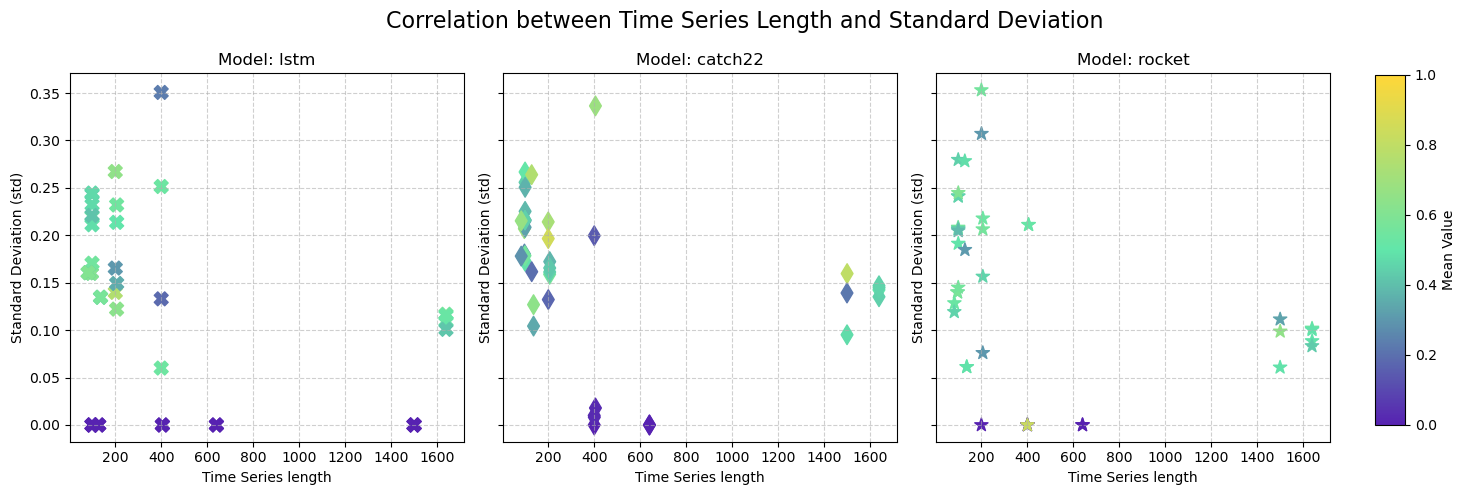

In [8]:
# Add jittering to n_classes to reduce overlap
np.random.seed(42)  # For reproducibility
df['ts_length_jittered'] = df['ts_length'] + np.random.uniform(-0.3, 0.3, size=len(df))  # Smaller jitter for classes

# Define a custom colormap for the mean values
colors = ["#5722B1", "#61E6AA", "#FFD738"]
cmap = LinearSegmentedColormap.from_list("custom_gradient", colors)

# Define unique markers for each model
models = df['model'].unique()
markers = ['X', 'd', '*']  # Different markers for each model
model_marker_map = {model: marker for model, marker in zip(models, markers)}

# Set up the subplots
fig, axes = plt.subplots(1, len(models), figsize=(15, 5), sharey=True)  # One subplot per model
fig.suptitle('Correlation between Time Series Length and Standard Deviation', fontsize=16)

# Plot each model in a separate subplot
for i, model in enumerate(models):
    ax = axes[i]
    model_df = df[df['model'] == model]  # Filter data for the current model
    
    # Plot the points
    scatter = ax.scatter(
        model_df['ts_length_jittered'], 
        model_df['std'], 
        c=model_df['mean'],  # Color based on 'mean' value
        cmap=cmap,  # Use the custom colormap
        vmin=0, vmax=1,  # Set the range for the colormap
        marker=model_marker_map[model],  # Marker based on model
        s=100  # Size of the points
    )
    
    #ax.set_xlim(80,140)
    # Add labels and title for each subplot
    ax.set_xlabel('Time Series length')
    ax.set_ylabel('Standard Deviation (std)')
    ax.set_title(f'Model: {model}')
    ax.grid(True, linestyle='--', alpha=0.6)

# Add a shared colorbar for all subplots
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Position of the colorbar [left, bottom, width, height]
cbar = fig.colorbar(scatter, cax=cbar_ax, label='Mean Value')

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the right margin to make space for the colorbar
plt.show()

### Plot Std and Number of Classes

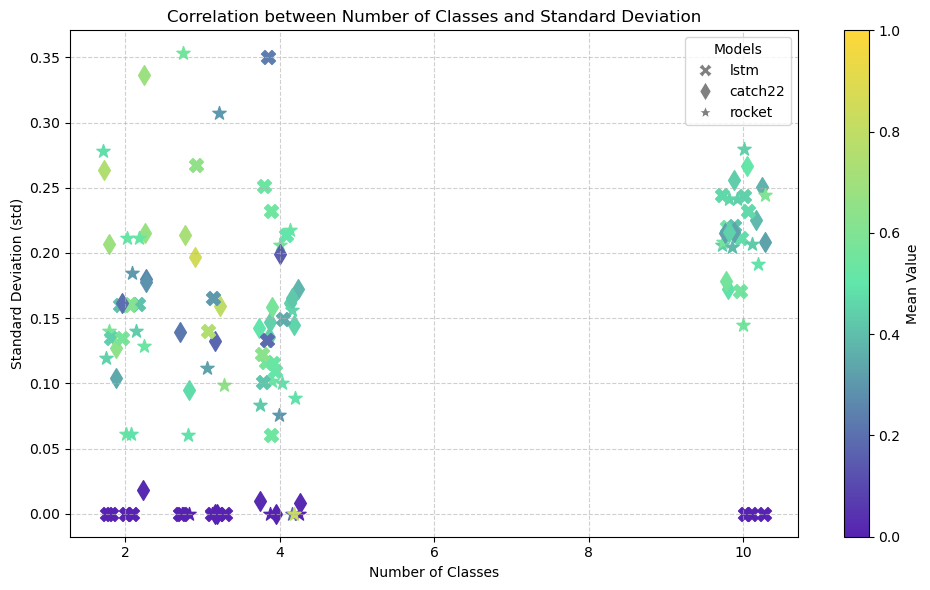

In [8]:
# Now you can continue with your plotting code
# Set up the plot
plt.figure(figsize=(10, 6))

# Add jittering to n_classes to reduce overlap
np.random.seed(42)  # For reproducibility
df['n_classes_jittered'] = df['n_classes'] + np.random.uniform(-0.3, 0.3,size=len(df))  # Smaller jitter for classes

# Define a custom colormap for the mean values
colors = ["#5722B1", "#61E6AA", "#FFD738"]
cmap = LinearSegmentedColormap.from_list("custom_gradient", colors)

# Define unique markers for each model
models = df['model'].unique()
markers = ['X', 'd', '*']  
model_marker_map = {model: marker for model, marker in zip(models, markers)}

# Plot each point
scatter = None  # Initialize scatter object for colorbar
for _, row in df.iterrows():
    scatter = plt.scatter(
        row['n_classes_jittered'], 
        row['std'], 
        c=row['mean'],  # Color based on 'mean' value
        cmap=cmap,  # Use the custom colormap
        vmin=0, vmax=1,  # Set the range for the colormap
        marker=model_marker_map[row['model']],  # Marker based on model
        s=100,  # Size of the points
        label=row['model'] if row['model'] not in plt.gca().get_legend_handles_labels()[1] else ""
    )

# Add labels and title
plt.xlabel('Number of Classes')
plt.ylabel('Standard Deviation (std)')
plt.title('Correlation between Number of Classes and Standard Deviation')

# Create custom legend for models
handles = []
for model, marker in model_marker_map.items():
    handles.append(plt.Line2D([0], [0], marker=marker, color='w', markerfacecolor='gray', markersize=10, label=model))
plt.legend(handles=handles, title='Models')

# Add colorbar for the mean values
if scatter is not None:
    cbar = plt.colorbar(scatter, label='Mean Value')

# Adjust layout
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

C:\Users\anton\AppData\Local\Temp\ipykernel_12576\1364541761.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the right margin to make space for the colorbar


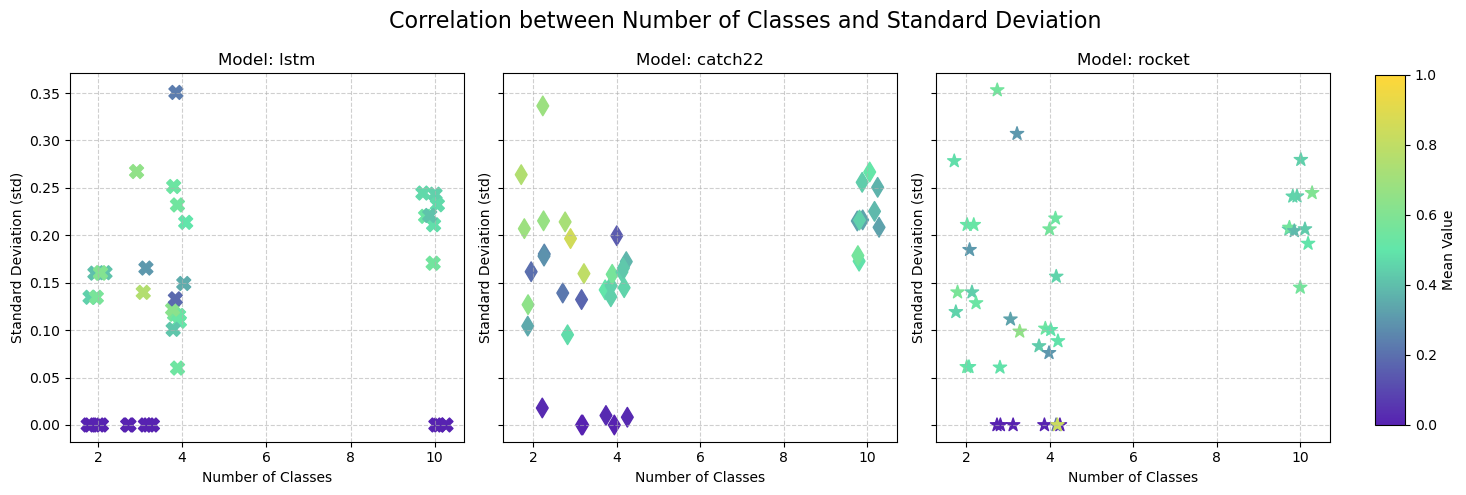

In [9]:
# Add jittering to n_classes to reduce overlap
np.random.seed(42)  # For reproducibility
df['n_classes_jittered'] = df['n_classes'] + np.random.uniform(-0.3, 0.3, size=len(df))  # Smaller jitter for classes

# Define a custom colormap for the mean values
colors = ["#5722B1", "#61E6AA", "#FFD738"]
cmap = LinearSegmentedColormap.from_list("custom_gradient", colors)

# Define unique markers for each model
models = df['model'].unique()
markers = ['X', 'd', '*']  # Different markers for each model
model_marker_map = {model: marker for model, marker in zip(models, markers)}

# Set up the subplots
fig, axes = plt.subplots(1, len(models), figsize=(15, 5), sharey=True)  # One subplot per model
fig.suptitle('Correlation between Number of Classes and Standard Deviation', fontsize=16)

# Plot each model in a separate subplot
for i, model in enumerate(models):
    ax = axes[i]
    model_df = df[df['model'] == model]  # Filter data for the current model
    
    # Plot the points
    scatter = ax.scatter(
        model_df['n_classes_jittered'], 
        model_df['std'], 
        c=model_df['mean'],  # Color based on 'mean' value
        cmap=cmap,  # Use the custom colormap
        vmin=0, vmax=1,  # Set the range for the colormap
        marker=model_marker_map[model],  # Marker based on model
        s=100  # Size of the points
    )
    
    # Add labels and title for each subplot
    ax.set_xlabel('Number of Classes')
    ax.set_ylabel('Standard Deviation (std)')
    ax.set_title(f'Model: {model}')
    ax.grid(True, linestyle='--', alpha=0.6)

# Add a shared colorbar for all subplots
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Position of the colorbar [left, bottom, width, height]
cbar = fig.colorbar(scatter, cax=cbar_ax, label='Mean Value')

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the right margin to make space for the colorbar
plt.show()

### Plot Std and Dataset Size

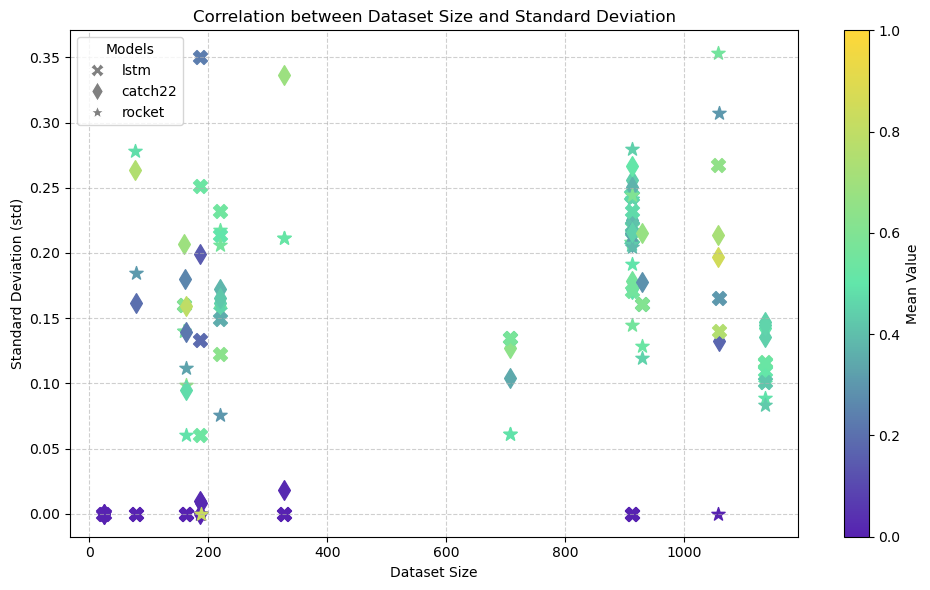

In [10]:
# Set up the plot
plt.figure(figsize=(10, 6))

# Add jittering to n_classes to reduce overlap
np.random.seed(42)  # For reproducibility
df['df_size_jittered'] = df['df_size'] + np.random.uniform(-0.3, 0.3,size=len(df))  # Smaller jitter for classes

# Define a custom colormap for the mean values
colors = ["#5722B1", "#61E6AA", "#FFD738"]
cmap = LinearSegmentedColormap.from_list("custom_gradient", colors)

# Define unique markers for each model
models = df['model'].unique()
markers = ['X', 'd', '*']  
model_marker_map = {model: marker for model, marker in zip(models, markers)}

# Plot each point
scatter = None  # Initialize scatter object for colorbar
for _, row in df.iterrows():
    scatter = plt.scatter(
        row['df_size_jittered'], 
        row['std'], 
        c=row['mean'],  # Color based on 'mean' value
        cmap=cmap,  # Use the custom colormap
        vmin=0, vmax=1,  # Set the range for the colormap
        marker=model_marker_map[row['model']],  # Marker based on model
        s=100,  # Size of the points
        label=row['model'] if row['model'] not in plt.gca().get_legend_handles_labels()[1] else ""
    )

# Add labels and title
plt.xlabel('Dataset Size')
plt.ylabel('Standard Deviation (std)')
plt.title('Correlation between Dataset Size and Standard Deviation')

# Create custom legend for models
handles = []
for model, marker in model_marker_map.items():
    handles.append(plt.Line2D([0], [0], marker=marker, color='w', markerfacecolor='gray', markersize=10, label=model))
plt.legend(handles=handles, title='Models')

# Add colorbar for the mean values
if scatter is not None:
    cbar = plt.colorbar(scatter, label='Mean Value')

# Adjust layout
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

C:\Users\anton\AppData\Local\Temp\ipykernel_12576\115865871.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the right margin to make space for the colorbar


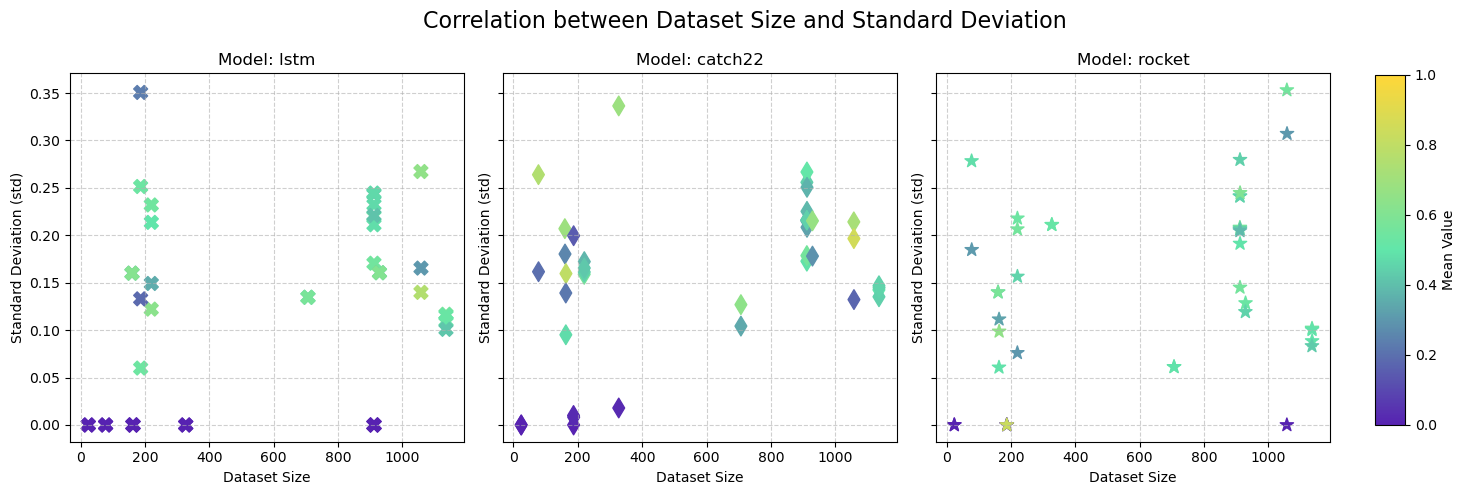

In [11]:
# Add jittering to n_classes to reduce overlap
np.random.seed(42)  # For reproducibility
df['df_size_jittered'] = df['df_size'] + np.random.uniform(-0.3, 0.3, size=len(df))  # Smaller jitter for classes

# Define a custom colormap for the mean values
colors = ["#5722B1", "#61E6AA", "#FFD738"]
cmap = LinearSegmentedColormap.from_list("custom_gradient", colors)

# Define unique markers for each model
models = df['model'].unique()
markers = ['X', 'd', '*']  # Different markers for each model
model_marker_map = {model: marker for model, marker in zip(models, markers)}

# Set up the subplots
fig, axes = plt.subplots(1, len(models), figsize=(15, 5), sharey=True)  # One subplot per model
fig.suptitle('Correlation between Dataset Size and Standard Deviation', fontsize=16)

# Plot each model in a separate subplot
for i, model in enumerate(models):
    ax = axes[i]
    model_df = df[df['model'] == model]  # Filter data for the current model
    
    # Plot the points
    scatter = ax.scatter(
        model_df['df_size_jittered'], 
        model_df['std'], 
        c=model_df['mean'],  # Color based on 'mean' value
        cmap=cmap,  # Use the custom colormap
        vmin=0, vmax=1,  # Set the range for the colormap
        marker=model_marker_map[model],  # Marker based on model
        s=100  # Size of the points
    )
    
    # Add labels and title for each subplot
    ax.set_xlabel('Dataset Size')
    ax.set_ylabel('Standard Deviation (std)')
    ax.set_title(f'Model: {model}')
    ax.grid(True, linestyle='--', alpha=0.6)

# Add a shared colorbar for all subplots
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Position of the colorbar [left, bottom, width, height]
cbar = fig.colorbar(scatter, cax=cbar_ax, label='Mean Value')

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the right margin to make space for the colorbar
plt.show()

### MIST comparative to Data Points

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xlim'

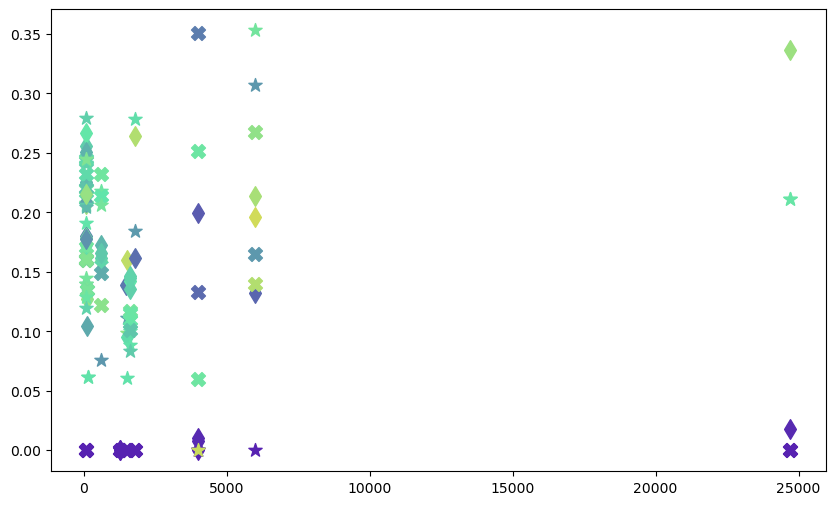

In [14]:
plt.figure(figsize=(10, 6))

# Add jittering to n_classes to reduce overlap
np.random.seed(42)  # For reproducibility
df['ts_length_jittered'] = df['ts_length'] + np.random.uniform(-0.3, 0.3,size=len(df))  # Smaller jitter for classes

# Define a custom colormap for the mean values
colors = ["#5722B1", "#61E6AA", "#FFD738"]
cmap = LinearSegmentedColormap.from_list("custom_gradient", colors)

# Define unique markers for each model
models = df['model'].unique()
markers = ['X', 'd', '*']  
model_marker_map = {model: marker for model, marker in zip(models, markers)}

# Plot each point
scatter = None  # Initialize scatter object for colorbar
for _, row in df.iterrows():
    complexity = row['ts_length_jittered'] * row['n_variates'] #* row['df_size'] 

    scatter = plt.scatter(
        complexity, 
        row['std'], 
        c=row['mean'],  # Color based on 'mean' value
        cmap=cmap,  # Use the custom colormap
        vmin=0, vmax=1,  # Set the range for the colormap
        marker=model_marker_map[row['model']],  # Marker based on model
        s=100,  # Size of the points
        label=row['model'] if row['model'] not in plt.gca().get_legend_handles_labels()[1] else ""
    )

plt.set_xlim(0,1000)

# Add labels and title
plt.xlabel('Time Series Length')
plt.ylabel('Standard Deviation (std)')
plt.title('Correlation between TS Complexity and Standard Deviation')

# Create custom legend for models
handles = []
for model, marker in model_marker_map.items():
    handles.append(plt.Line2D([0], [0], marker=marker, color='w', markerfacecolor='gray', markersize=10, label=model))
plt.legend(handles=handles, title='Models')

# Add colorbar for the mean values
if scatter is not None:
    cbar = plt.colorbar(scatter, label='Mean Value')

# Adjust layout
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

C:\Users\anton\AppData\Local\Temp\ipykernel_11764\78988418.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the right margin to make space for the colorbar


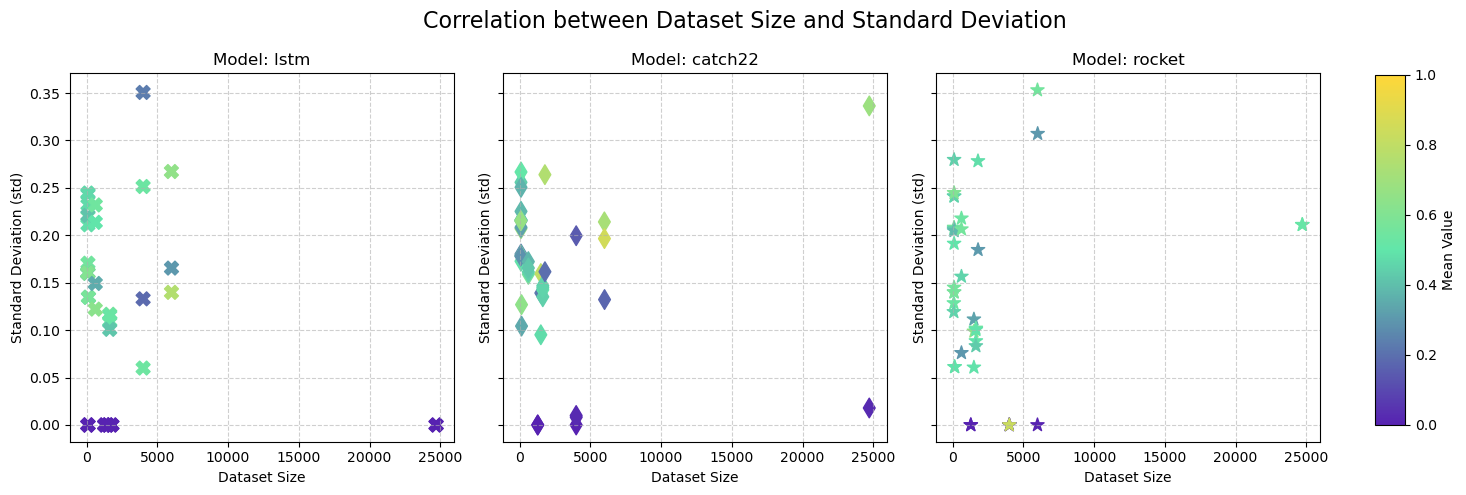

In [12]:
# Add jittering to n_classes to reduce overlap
np.random.seed(42)  # For reproducibility
df['df_size_jittered'] = df['df_size'] + np.random.uniform(-0.3, 0.3, size=len(df))  # Smaller jitter for classes

# Define a custom colormap for the mean values
colors = ["#5722B1", "#61E6AA", "#FFD738"]
cmap = LinearSegmentedColormap.from_list("custom_gradient", colors)

# Define unique markers for each model
models = df['model'].unique()
markers = ['X', 'd', '*']  # Different markers for each model
model_marker_map = {model: marker for model, marker in zip(models, markers)}

# Set up the subplots
fig, axes = plt.subplots(1, len(models), figsize=(15, 5), sharey=True)  # One subplot per model
fig.suptitle('Correlation between Dataset Size and Standard Deviation', fontsize=16)

# Plot each model in a separate subplot
for i, model in enumerate(models):
    ax = axes[i]
    model_df = df[df['model'] == model]  # Filter data for the current model
    complexity = model_df['ts_length_jittered'] * model_df['n_variates']

    # Plot the points
    scatter = ax.scatter(
        complexity, 
        model_df['std'], 
        c=model_df['mean'],  # Color based on 'mean' value
        cmap=cmap,  # Use the custom colormap
        vmin=0, vmax=1,  # Set the range for the colormap
        marker=model_marker_map[model],  # Marker based on model
        s=100  # Size of the points
    )

    #ax.set_xlim(0,300000)
    
    # Add labels and title for each subplot
    ax.set_xlabel('Dataset Size')
    ax.set_ylabel('Standard Deviation (std)')
    ax.set_title(f'Model: {model}')
    ax.grid(True, linestyle='--', alpha=0.6)

# Add a shared colorbar for all subplots
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Position of the colorbar [left, bottom, width, height]
cbar = fig.colorbar(scatter, cax=cbar_ax, label='Mean Value')

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the right margin to make space for the colorbar
plt.show()